# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{\rm Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m$^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}^*$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [135]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [136]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K

k_fwd_star = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte_o = 46.05    # Total (reference) elyte concentration, kmol/m2
C_Ni_s_o = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

# "Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

nu_pp_Ox_elyte = 0
nu_pp_H_Ni = 0
nu_pp_Vac_elyte = 1
nu_pp_H2O_Ni = 1
nu_pp_Vac_Ni = 1

nu_p_Ox_elyte = 1
nu_p_H_Ni = 2
nu_p_Vac_elyte = 0
nu_p_H2O_Ni = 0
nu_p_Vac_Ni = 0

nu_Ox_elyte = nu_pp_Ox_elyte - nu_p_Ox_elyte
nu_H_Ni = nu_pp_H_Ni - nu_p_H_Ni
nu_Vac_elyte = nu_pp_Vac_elyte - nu_p_Vac_elyte
nu_H2O_Ni = nu_pp_H2O_Ni - nu_p_H2O_Ni
nu_Vac_Ni = nu_pp_Vac_Ni - nu_p_Vac_Ni


# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])

### Add some calculations to the following code block:

In [137]:
#print("Hello World")
T = 800 +273.15 # Temperature, K
beta = 0.5 # Assumption
n_elec = -2 # Positive charge transfered to the anode for the forward reaction
# Calculate the standard state gibbs energy of the reaction
del_G_rxn_o = (nu_Ox_elyte*g_Ox_elyte_o)+(nu_H_Ni*g_H_Ni_o)+(nu_Vac_elyte*g_Vac_elyte_o)+(nu_H2O_Ni*g_H2O_Ni_o)+(nu_Vac_Ni*g_Vac_Ni_o)

# Calculate various products needed for calculations
# C_ac = theta_k*Gamma = X_k*C^o
# C^o for each species is the total surface concentration
prod_C_ac_nu_p = ((C_elyte_o*X_Ox_elyte)**nu_p_Ox_elyte) * ((C_Ni_s_o*X_H_Ni)**nu_p_H_Ni) * ((C_elyte_o*X_Vac_elyte)**nu_p_Vac_elyte) * ((C_Ni_s_o*X_H2O_Ni)**nu_p_H2O_Ni) * ((C_Ni_s_o*X_Vac_Ni)**nu_p_Vac_Ni)
prod_C_ac_nu_pp = ((C_elyte_o*X_Ox_elyte)**nu_pp_Ox_elyte) * ((C_Ni_s_o*X_H_Ni)**nu_pp_H_Ni) * ((C_elyte_o*X_Vac_elyte)**nu_pp_Vac_elyte) * ((C_Ni_s_o*X_H2O_Ni)**nu_pp_H2O_Ni) * ((C_Ni_s_o*X_Vac_Ni)**nu_pp_Vac_Ni)
prod_C_o_nu = (C_elyte_o**(nu_Ox_elyte + nu_Vac_elyte))*(C_Ni_s_o**(nu_H_Ni + nu_H2O_Ni + nu_Vac_Ni)) #This should equal 1
#print(prod_C_o_nu)
# **old** ((gamma_Ox_elyte*X_Ox_elyte)**nu_p_Ox_elyte)*((gamma_H_Ni*X_H_Ni)**nu_p_H_Ni)*((gamma_Vac_elyte*X_Vac_elyte)**nu_p_Vac_elyte)*((gamma_H2O_Ni*X_H2O_Ni)**nu_p_H2O_Ni)*((gamma_Vac_Ni*X_Vac_Ni)**nu_p_Vac_Ni)

# Calculate k_rev_star from the derivation from part 1.1
k_rev_star = k_fwd_star/(prod_C_o_nu*exp((-del_G_rxn_o)/(R*T)))

# Loop over these delta phi = phi_anode - phi_elyte values to find i_MA:
delta_phi = np.linspace(-0.9,0.05,100) # Array of delta_phi values
#delta_phi = np.linspace(-1.0,0.15,100) # Array of delta_phi values
i_elementary = np.zeros_like(delta_phi) #Initialize array for i_MA, preallocation

for ind, E in enumerate(delta_phi):
    #k_fwd = k_fwd_star * exp((-beta*n_elec*F*delta_phi)/(R*T))
    #k_rev = k_rev_star * exp(((1-beta)*n_elec*F*delta_phi)/(R*T))
    k_fwd = k_fwd_star * exp((-beta*n_elec*F*E)/(R*T))
    k_rev = k_rev_star * exp(((1-beta)*n_elec*F*E)/(R*T))
    i_elementary[ind] = n_elec*F*(k_fwd*prod_C_ac_nu_p - k_rev*prod_C_ac_nu_pp)
    

Plot the results:

Text(0, 0.5, 'Current [A/m2]')

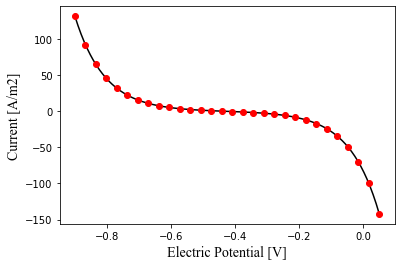

In [138]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

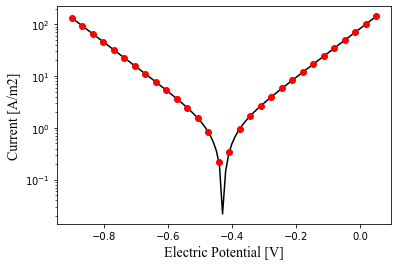

In [139]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:
Do they make sense, and match with your understanding of the theory?  In what ways? Do they match the validation data?  If not, what might be missing from your code?

For mass-action kinetics, the rate of progress for a charge transfer reaction is 

$$\dot{q} = k_{fwd}^* \prod C_{ac,k}^{\nu_k^{'}} \exp\left(\frac{-\beta n_{elec}F \Delta \phi}{RT}\right)-k_{rev}^* \prod C_{ac,k}^{\nu_k^{''}} \exp\left(\frac{(1-\beta) n_{elec}F \Delta \phi}{RT}\right)$$

For large negative values of $\Delta \phi$ one can see the forward rate will decrease, as the evaluated exponential decreases, while the reverse rate will increase. This will results in a negative $\dot{q}$ value and vise-versa for large positive values of $\Delta \phi$. 
Using Faraday's Law, the current is found by

$$ i = nF\dot{q} $$

From this equation, one can see that when $\dot{q}$ is negative, current is positive (assuming n = -2) and vise-versa. This result is consistant with what is seen in the results. The current found from mass-action derivation matches well to the verification data.  If there are any slight differences, this may be contributed to the assumed value of $\beta$.

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [140]:
i_BV = np.zeros_like(delta_phi)
prod_C_ac_nu_p_1minbeta = ((C_elyte_o*X_Ox_elyte)**(nu_p_Ox_elyte*(1-beta))) * ((C_Ni_s_o*X_H_Ni)**(nu_p_H_Ni*(1-beta))) * ((C_elyte_o*X_Vac_elyte)**(nu_p_Vac_elyte*(1-beta))) * ((C_Ni_s_o*X_H2O_Ni)**(nu_p_H2O_Ni*(1-beta))) * ((C_Ni_s_o*X_Vac_Ni)**(nu_p_Vac_Ni*(1-beta)))
prod_C_ac_nu_pp_beta = ((C_elyte_o*X_Ox_elyte)**(nu_pp_Ox_elyte*beta)) * ((C_Ni_s_o*X_H_Ni)**(nu_pp_H_Ni*beta)) * ((C_elyte_o*X_Vac_elyte)**(nu_pp_Vac_elyte*beta)) * ((C_Ni_s_o*X_H2O_Ni)**(nu_pp_H2O_Ni*beta)) * ((C_Ni_s_o*X_Vac_Ni)**(nu_pp_Vac_Ni*beta))
i_o = n_elec*F*(k_fwd_star**(1-beta))*(k_rev_star**(beta))*prod_C_ac_nu_p_1minbeta*prod_C_ac_nu_pp_beta
# activity coefficient a_k = C_ac/C^o = X (or theta)
prod_a_k_nu = (X_Ox_elyte**nu_Ox_elyte) * (X_H_Ni**nu_H_Ni) * (X_Vac_elyte**nu_Vac_elyte) * (X_H2O_Ni**nu_H2O_Ni) * (X_Vac_Ni**nu_Vac_Ni)
del_G_rxn = del_G_rxn_o + R*T*log(prod_a_k_nu)
del_phi_eq = -del_G_rxn/(n_elec*F)
print("Equilibrium voltage is", del_phi_eq, "V")
for ind, E in enumerate(delta_phi):
    eta = E - del_phi_eq
    i_BV[ind] = i_o*(exp((-beta*n_elec*F*eta)/(R*T))-exp(((1-beta)*n_elec*F*eta)/(R*T)))
    
print("Exchange current density is",i_o, "A/m^2")

Equilibrium voltage is -0.4285383062561828 V
Exchange current density is -0.8047559339909198 A/m^2


#### Let's plot the BV and Marcus currents together:

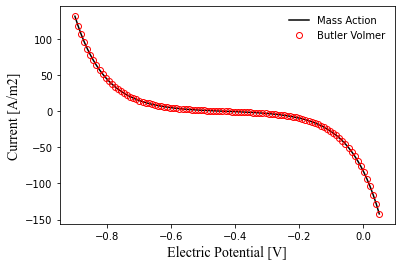

In [141]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

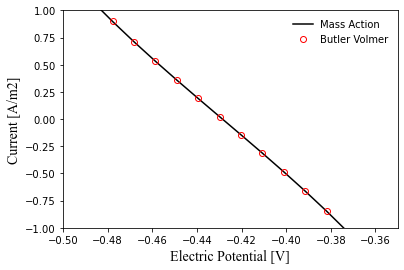

In [142]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.xlim((-0.5,-0.35))
plt.ylim((-1,1))
plt.show()

#### Discussion:

Discuss your plots.  Make new plots, as desired, to aid in your discussion and highlight noteworthy results. How do you feel about the assumption of constant $i_\circ$?  Are there situations where this is _not_ a good assumption?

Butler-Volmer formulation can be derived from mass-action formulation. As expected, the results from BV match well to MA. From Butler-Volmer, we expect that with low overpotentials (i < $|i_\circ|$) there is a region where potential and current are linearly related. This linear relationship is shown in the second figure where $i_\circ \approx$ -0.8 Am$^{-2}$. Also, when the current goes to zero, the electrical potential should be the equilibrium potential. $\Delta \phi^{eq} \approx$ -0.43 V. In the second figure, one will note that in fact, the current is zero when $\Delta \phi \approx$ -0.43 V.

In this situation where we are just looking at a single instant in time and performing a parametric study on current, constant $i_\circ$ is a pretty good assumption. One may argue though that if current is modeled over the entire charge or discharge cycle of a device, changes in electrode concentration/potential could have an impact on $i_\circ$. Also, an increased rate of charge or discharge could results in heat generation. This heat generation would change the forward and reverse rates for a chemical reaction and therefore changing $k_{fwd}^*$ and $k_{rev}^*$.

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [143]:
i_Tafel = np.zeros_like(delta_phi)
eta = np.zeros_like(delta_phi)
i_a = np.zeros_like(delta_phi)
i_c = np.zeros_like(delta_phi)

alpha_a = n_elec*beta
alpha_c = n_elec*(1-beta)
print("alpha_a = ", alpha_a)
print("alpha_c = ", alpha_c)

for ind, E in enumerate(delta_phi):
    eta[ind] = E - del_phi_eq
    #print(eta[ind])
    #i_a[ind] = i_o*exp((alpha_a*F*eta[ind])/(R*T))
    i_c[ind] = -i_o*exp((alpha_c*F*eta[ind])/(R*T))
    #i_Tafel[ind] = i_a[ind] + i_c[ind]
    i_Tafel[ind] = i_o*exp(-(alpha_a*F*eta[ind])/(R*T))

#print(eta)

alpha_a =  -1.0
alpha_c =  -1.0


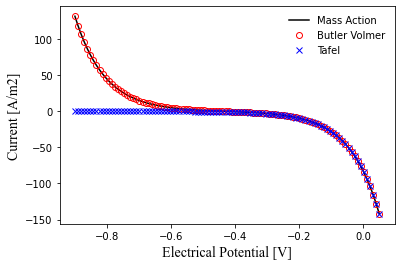

In [144]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
#plt.plot(delta_phi,i_a,'x',markeredgecolor='g',markerfacecolor='none');
#plt.plot(delta_phi,i_c,'x',markeredgecolor='m',markerfacecolor='none');
plt.xlabel('Electrical Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Disucssion: 
What do you notice, from these results?  What from the theory can explain what you see.

Tafel approximation assumes that for a high overpotential, either forward or reverse rate of reaction dominates while the other goes to zero. For the results above, Tafel current assumes the forward rate of reaction dominates. To see reverse reaction dominate, see the very last figure. As mentioned above, a large $\Delta \phi$ corresponds to a large forward rate of reaction. This is consistant with the Tafel plots. As $\delta \phi$ (and hence overpotential) get larger, the error between Butler-Volmer current and Tafel current becomes smaller. Vise-versa is true and is seen in the very last figure.

Also, Tafel approximation says that when overpotential is 0, the current is equal to $i_\circ$. This result is shown below (Second to last figure). 

#### Play with the limits, below, to highlight trends which support your discussion claims.

Feel free to copy the following code block and zoom in on different regions.

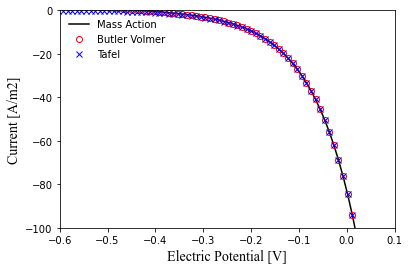

In [145]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.6,0.1))
plt.ylim((-100,0))
plt.show()

Region where Tafel assumptions breakdown (overpotential is smaller)

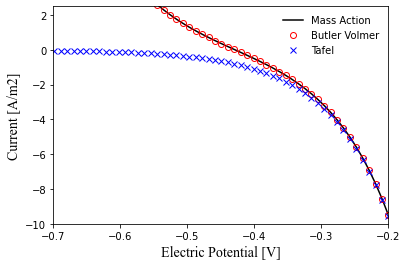

In [146]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.7,-0.2))
plt.ylim((-10,2.5))
plt.show()

High overpotential region:
Tafel matches almost exactly with Butler-Volmer

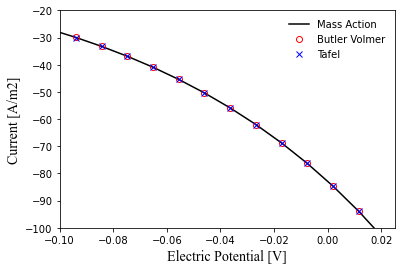

In [147]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.1,0.025))
plt.ylim((-100,-20))
plt.show()

The last set of plots compare current verses overpotential instead of electrical potential

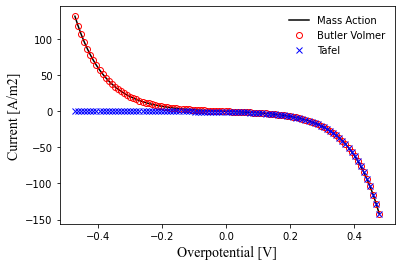

In [148]:
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(eta,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
#plt.plot(eta,i_a,'x',markeredgecolor='g',markerfacecolor='none');
#plt.plot(eta,i_c,'x',markeredgecolor='m',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

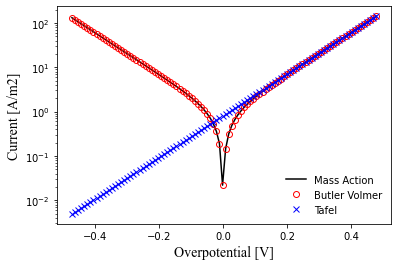

In [149]:
plt.semilogy(eta,abs(i_elementary),linewidth = 1.5,color = 'k');
plt.semilogy(eta,abs(i_BV),'o',markeredgecolor='r',markerfacecolor='none');
plt.semilogy(eta,abs(i_Tafel),'x',markeredgecolor='b',markerfacecolor='none');
#plt.semilogy(eta,abs(i_a),'x',markeredgecolor='g',markerfacecolor='none');
#plt.semilogy(eta,abs(i_c),'x',markeredgecolor='m',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

This figure shows that i = $i_\circ$ when overpotential = 0

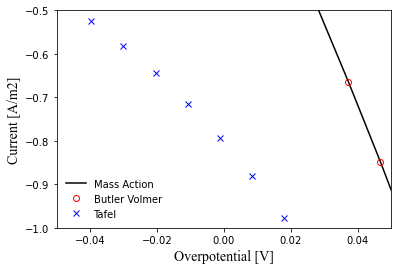

In [150]:
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(eta,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.05,0.05))
plt.ylim((-1,-0.5))
plt.show()

This figure shows the cathodic or reverse current using the Tafel approximation.

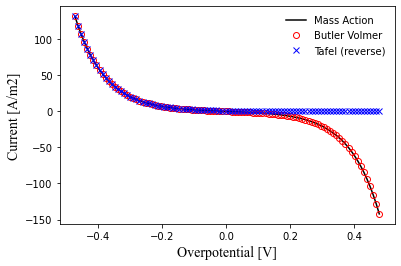

In [151]:
plt.plot(eta,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(eta,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(eta,i_c,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel (reverse)'],frameon=False)
plt.show()